<h3>Analyzing and Predicting "Magnificent 7" Stocks</h3> 

Using pandas to analyze data, including value, risk and return metrics, of the "Magnificent 7" companies: Meta, Apple, Amazon, Netflix, Google, NVDA and TSLA 

In [124]:
from __future__ import division  #using this, the (/) operator retuens float value 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
import yfinance as yf
import scipy.stats as stats

In [125]:
stock_list = ['AAPL', 'GOOG', 'META', 'AMZN', 'NFLX', 'NVDA', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end)

C:\Users\harsh\AppData\Local\Temp\ipykernel_50924\752854506.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed
C:\Users\harsh\AppData\Local\Temp\ipykernel_50924\752854506.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed
C:\Users\harsh\AppData\Local\Temp\ipykernel_50924\752854506.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed
C:\Users\harsh\AppData\Local\Temp\ipykernel_50924\752854506.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock,start,end)
[****************

In [126]:
GOOG.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,178.835907,180.827464,176.683181,178.659732,2.222755e+07
std,17.925839,17.802739,17.760709,17.621423,1.048554e+07
min,146.273285,150.743919,142.361486,143.089954,2.117956e+06
25%,165.773361,167.188258,163.821486,165.490496,1.527915e+07
50%,175.003586,177.061750,172.685649,174.633823,1.985400e+07
75%,192.421837,193.897054,189.810299,192.153019,2.538105e+07
max,239.940002,242.080002,238.110001,240.199997,7.872980e+07


Change in the stock price over time

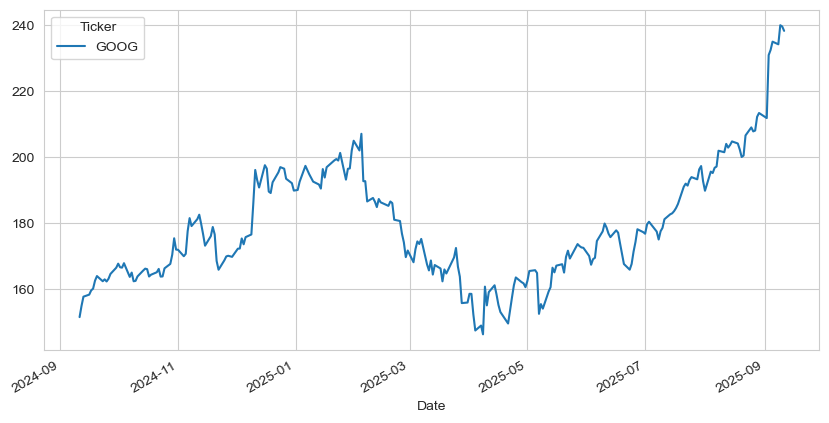

In [127]:
GOOG['Close'].plot(legend = True, figsize = (10,5))
plt.show()

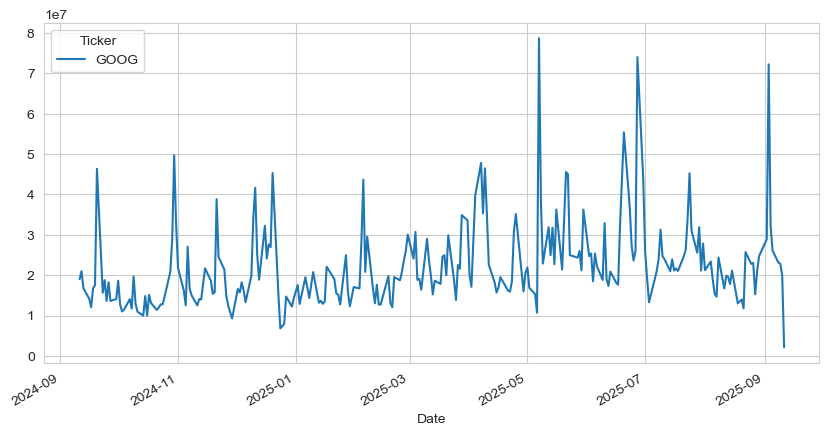

In [128]:
GOOG['Volume'].plot(legend = True, figsize = (10,5))
plt.show()

<h3>Calculating Moving Averages</h3>

Moving Averages for n days, means the average of the last n days from the selected date. A moving average helps level the price action by reducing the market noise, to better understand the trends that the market has established.

In [129]:
averages = [10,25,50]

for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    GOOG[label] = GOOG['Close'].rolling(window = avg, center = False).mean()

GOOG.tail()

Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,
Date,,,,,,,,
2025-09-05,234.959991,235.919141,232.172490,232.452238,26127700,216.692322,206.667682,195.655724
2025-09-08,234.160004,238.399994,233.729996,235.789993,23128800,219.454782,208.442867,196.853439
2025-09-09,239.940002,240.589996,233.380005,234.190002,22854800,222.551460,210.217460,198.090023
2025-09-10,239.559998,242.080002,238.110001,239.250000,19972500,225.731030,211.994036,199.336591
2025-09-11,238.229996,240.750000,237.300003,240.199997,2117956,228.751622,213.653470,200.566151


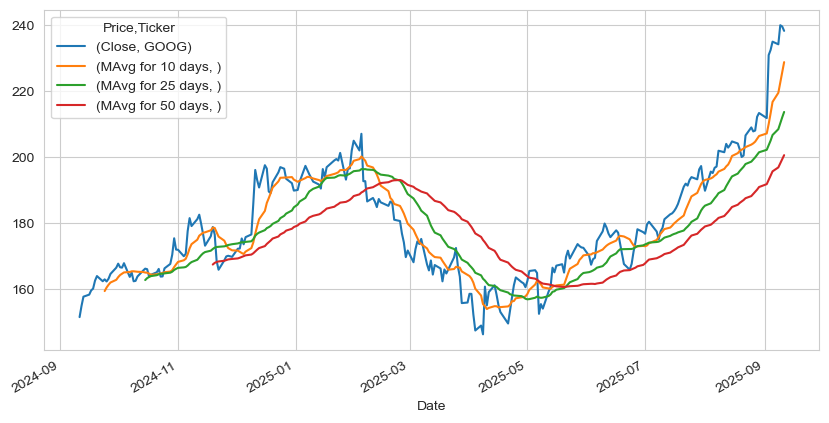

In [130]:
GOOG[['Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots=False, figsize=(10, 5))
plt.show()

The 50 day moving average graph shows the sentiment of the market. <br>
--> Rise in stock prices due to unveiling of google's quantum chip Willow <br> 
--> Decrease in stock price due to underwhelming Q4 output <br>
--> Recent increase due to Google I/O event, in which Google's AI tools were well received

<h3> Daily Return Averages </h3>

In [131]:
close_prices = GOOG[('Close', 'GOOG')]
daily_returns = close_prices.pct_change()
GOOG[('Daily Return', 'GOOG')] = daily_returns
GOOG.tail()

Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,,GOOG
Date,,,,,,,,,
2025-09-05,234.959991,235.919141,232.172490,232.452238,26127700,216.692322,206.667682,195.655724,0.010788
2025-09-08,234.160004,238.399994,233.729996,235.789993,23128800,219.454782,208.442867,196.853439,-0.003405
2025-09-09,239.940002,240.589996,233.380005,234.190002,22854800,222.551460,210.217460,198.090023,0.024684
2025-09-10,239.559998,242.080002,238.110001,239.250000,19972500,225.731030,211.994036,199.336591,-0.001584
2025-09-11,238.229996,240.750000,237.300003,240.199997,2117956,228.751622,213.653470,200.566151,-0.005552


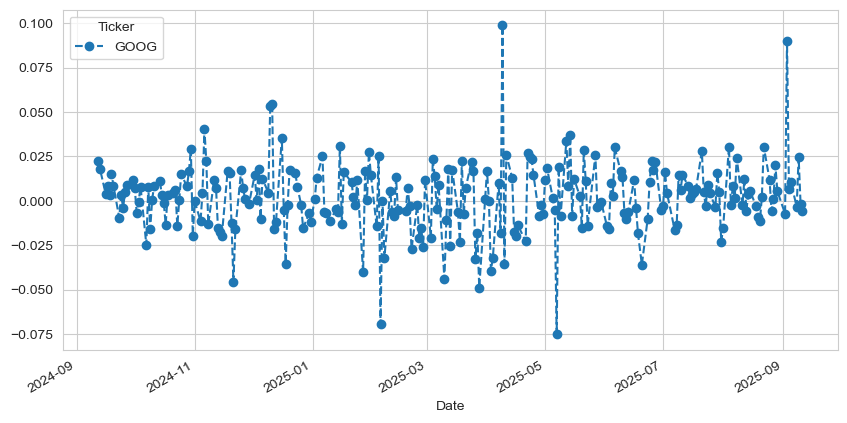

In [132]:
GOOG['Daily Return'].plot(figsize = (10,5), legend=True, linestyle='--', marker='o')
plt.show()

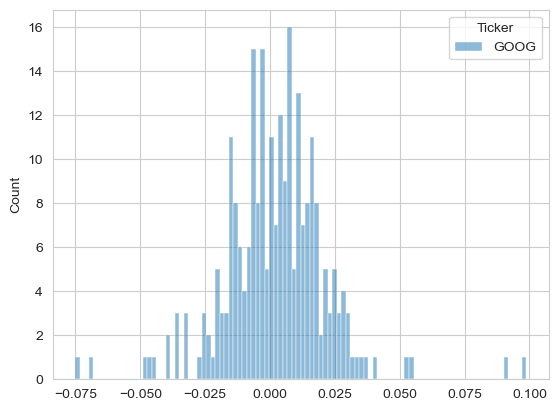

In [133]:
sns.histplot(GOOG['Daily Return'].dropna(), bins=100,color='red')
plt.show()

Through this distribution we can see that distribution of daily returns is heavily concentrated around 0.

<h3> Correlation Between Daily Returns of different stocks </h3>

Now let's try to examine the trend between the pairs of the 'MAANG' stocks using Seaborn's joint plot feature, using the percentage change of the daily returns.

In [134]:
close_compr = yf.download(stock_list, start, end)['Close']
rets_compr = close_compr.pct_change()

rets_compr.tail()

C:\Users\harsh\AppData\Local\Temp\ipykernel_50924\2850576507.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close_compr = yf.download(stock_list, start, end)['Close']
[*********************100%***********************]  7 of 7 completed


Ticker,AAPL,AMZN,GOOG,META,NFLX,NVDA,TSLA
Date,,,,,,,
2025-09-05,-0.000375,-0.014214,0.010788,0.005076,-0.010863,-0.027030,0.036363
2025-09-08,-0.007551,0.015108,-0.003405,-0.000199,0.000756,0.007724,-0.012655
2025-09-09,-0.014839,0.010176,0.024684,0.017812,0.014854,0.014556,0.001646
2025-09-10,-0.032259,-0.033202,-0.001584,-0.017918,-0.012302,0.038475,0.002363
2025-09-11,0.005820,0.001259,-0.005613,0.002202,-0.006179,0.005121,0.004514


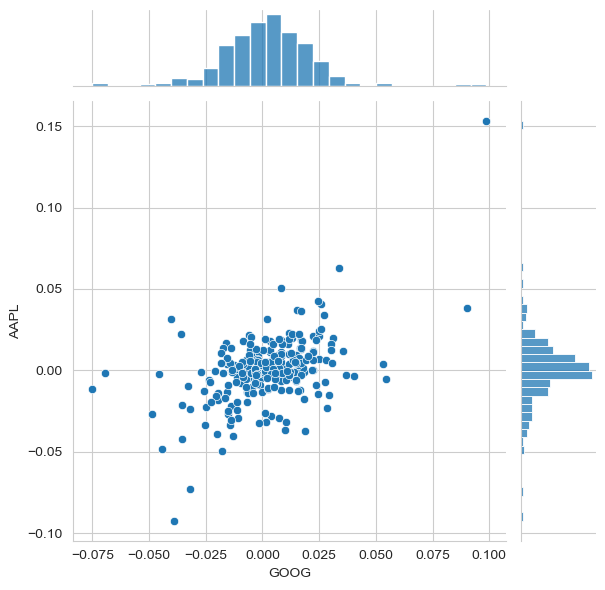

In [135]:
import scipy.stats as stats

sns.jointplot(data = rets_compr, x = 'GOOG', y ='AAPL', kind='scatter')
plt.show()

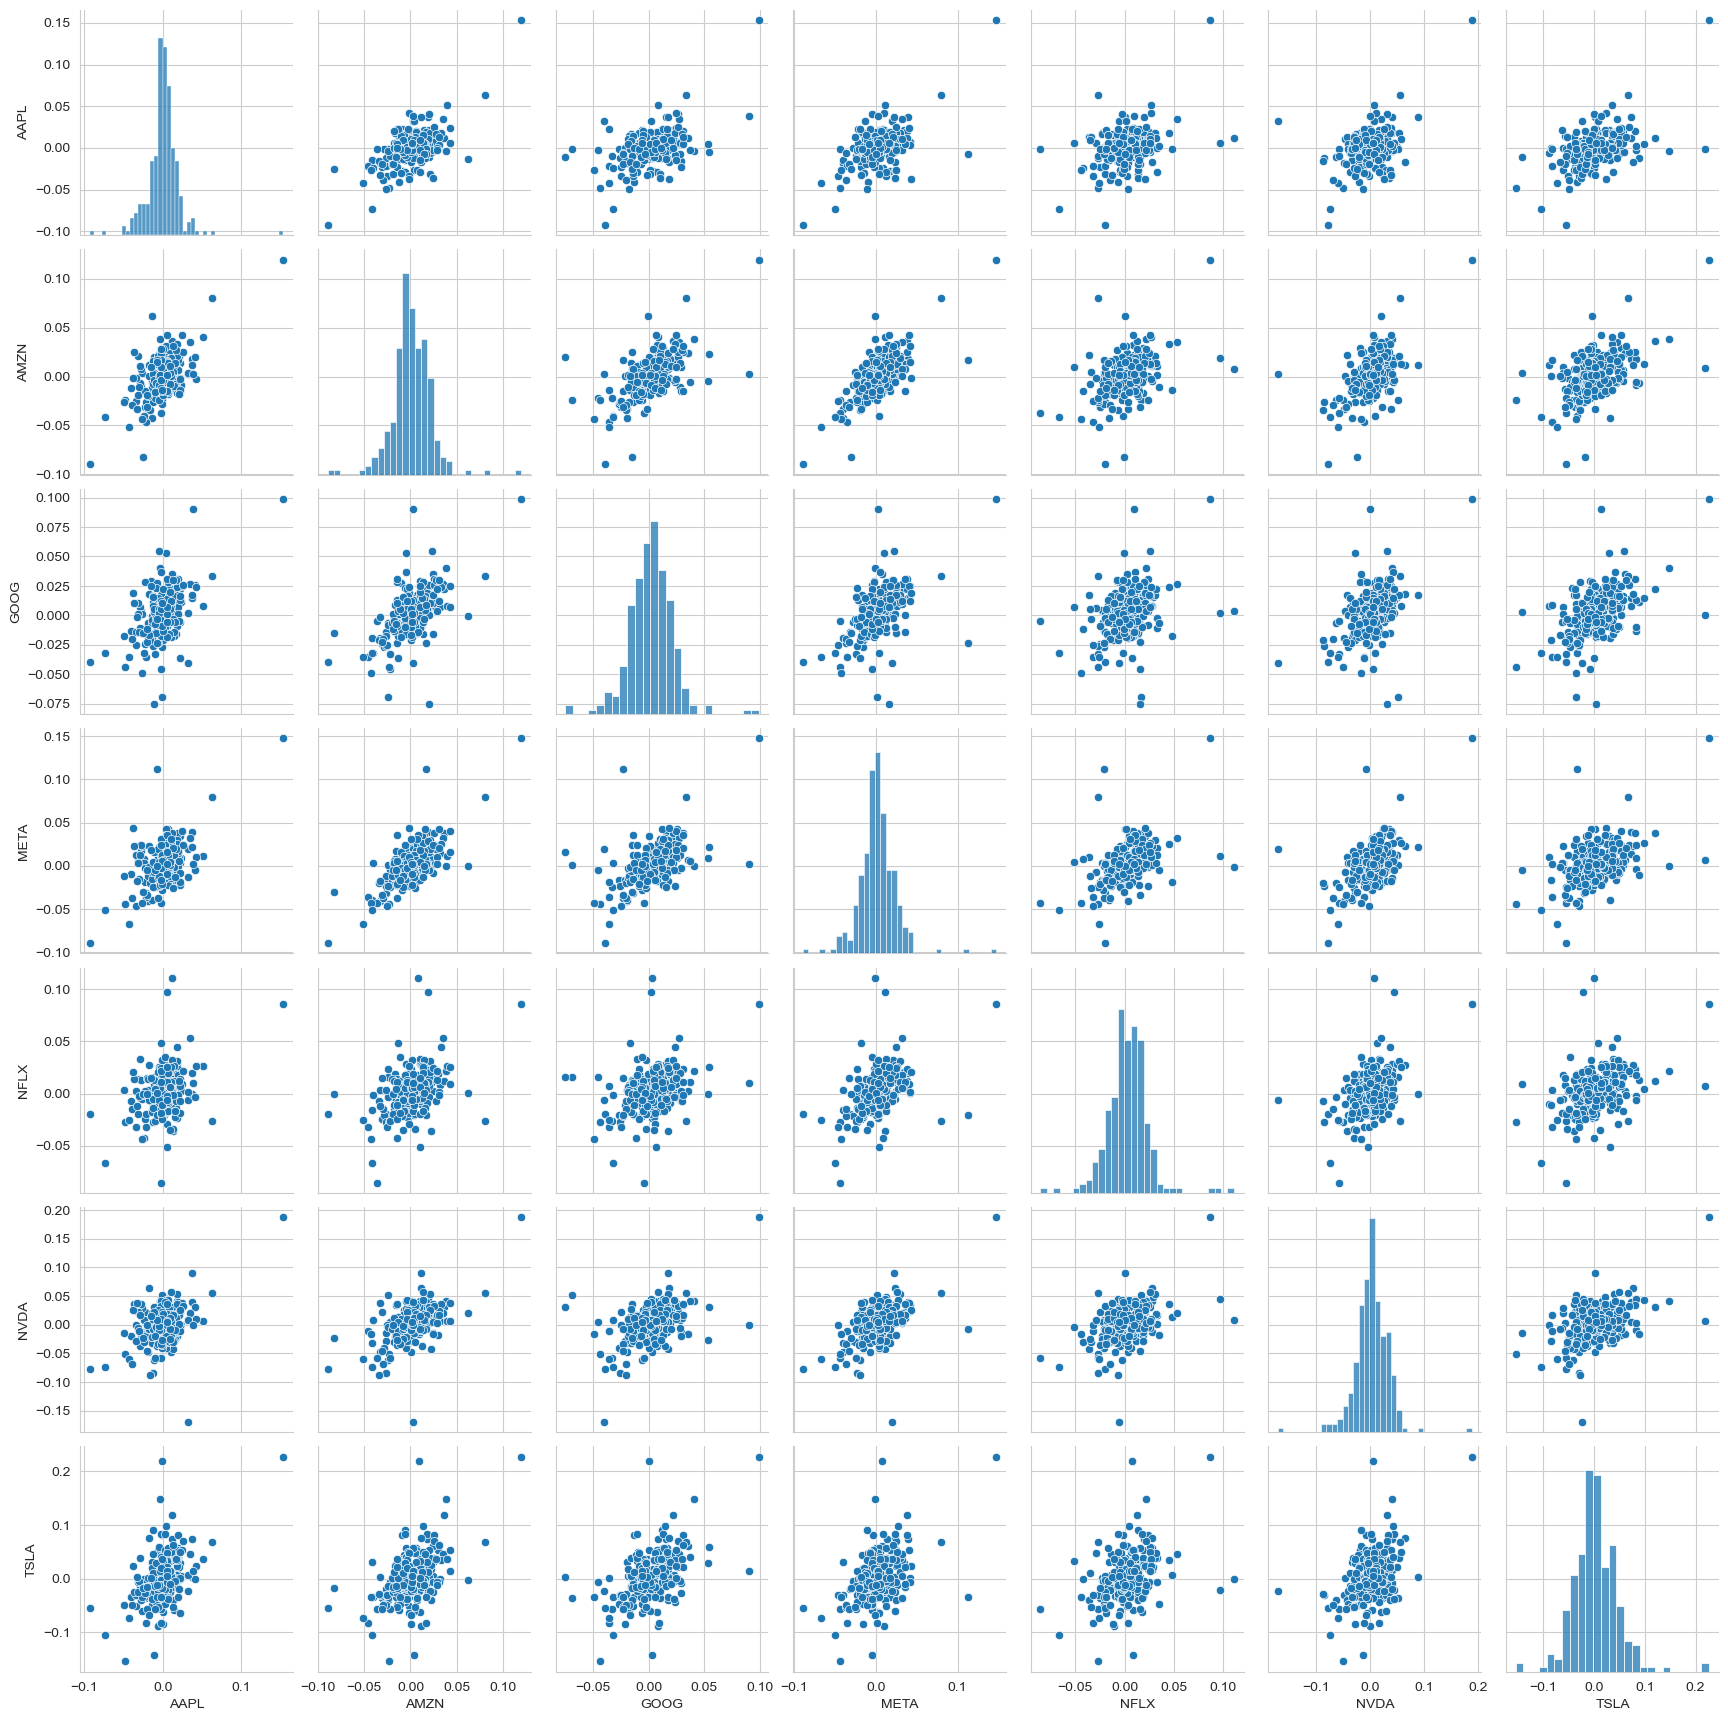

In [136]:
sns.pairplot(rets_compr.dropna())
plt.show()

In [137]:
corr = rets_compr.corr()
print(corr)

Ticker      AAPL      AMZN      GOOG      META      NFLX      NVDA      TSLA
Ticker                                                                      
AAPL    1.000000  0.601311  0.496716  0.541687  0.354178  0.434623  0.485001
AMZN    0.601311  1.000000  0.597757  0.727739  0.442283  0.569724  0.497817
GOOG    0.496716  0.597757  1.000000  0.521466  0.335962  0.472963  0.501370
META    0.541687  0.727739  0.521466  1.000000  0.443007  0.567996  0.470468
NFLX    0.354178  0.442283  0.335962  0.443007  1.000000  0.468712  0.364562
NVDA    0.434623  0.569724  0.472963  0.567996  0.468712  1.000000  0.453615
TSLA    0.485001  0.497817  0.501370  0.470468  0.364562  0.453615  1.000000


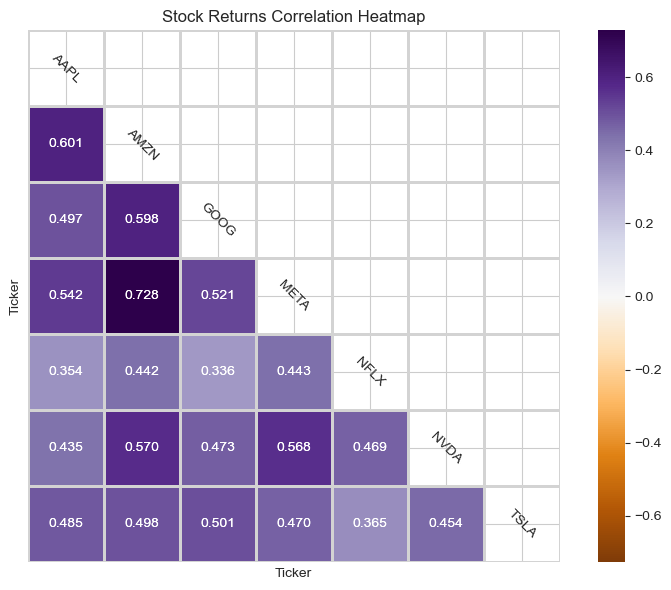

In [138]:
mask_upper = np.triu(np.ones_like(corr, dtype=bool))  # True for upper triangle[2]
mask_lower = mask_upper[::-1, :]                      # Flip rows for lower triangle[2]

# 4. Determine symmetric vmin/vmax for centered diverging palette
vmax = np.abs(corr.values[~mask_upper]).max()  # max absolute corr in lower triangle[2]

# 5. Plot heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    corr,
    mask=mask_upper,            # hide upper triangle
    annot=True,                 # display correlation values
    fmt=".3f",                  # three decimal places
    cmap="PuOr",                # Purple–Orange diverging palette
    vmin=-vmax, vmax=vmax,      # center palette at zero
    square=True, linewidths=1,  # square cells with grid lines
    linecolor="lightgray"
)
# 6. Add lower‐triangle annotations manually for the flipped half
for i in range(len(corr)):
    plt.text(i+0.5,(i+0.5), corr.columns[i], ha = 'center', va = 'center', rotation = -45)
    for j in range(i + 1, len(corr)):
        value = corr.values[j, i]
        plt.text(i + 0.5, j + 0.5, f"{value:.3f}",
                 ha="center", va="center", color="white")

ax.tick_params(axis='both', which='both', labelbottom=False, labelleft=False)

plt.title("Stock Returns Correlation Heatmap")
plt.tight_layout()
plt.show()

By this we can see that the strongest correlation is between the AMZN and META stock having the correlation value of 0.736, maybe due to their joint venture of seamless Amazon shopping experience through META ads on their social networking platforms or maybe them being companies having advertisment revenue as a good portion of revenue 

<h3> Determining the Value from Risk vs Expected Return

In [139]:
market_data = yf.download('^GSPC', start=start, end=end)['Close']
close_compr['^GSPC'] = market_data
rets_compr['^GSPC'] = close_compr['^GSPC'].pct_change()

def calculate_beta(stock_returns, market_returns):

    stock_returns = stock_returns.dropna()
    market_returns = market_returns.dropna()

    stock_returns, market_returns = stock_returns.align(market_returns, join='inner')
    
    covariance = np.cov(stock_returns, market_returns)[0, 1]
    variance = np.var(market_returns)
    beta = covariance / variance
    return beta


C:\Users\harsh\AppData\Local\Temp\ipykernel_50924\113994538.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_data = yf.download('^GSPC', start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed


In [140]:
# Calculate beta for each Magnificent 7 stocks
betas = {}
for stock in stock_list:  # Using your existing stock_list
    stock_returns = rets_compr[stock]
    market_returns = rets_compr['^GSPC']
    beta = calculate_beta(stock_returns, market_returns)
    betas[stock] = beta
    print(f"Beta for {stock}: {beta:.4f}")

# Create a DataFrame for better visualization
beta_df = pd.DataFrame(list(betas.items()), columns=['Stock', 'Beta'])
beta_df = beta_df.sort_values('Beta', ascending=False)


Beta for AAPL: 1.3027
Beta for GOOG: 1.0463
Beta for META: 1.4386
Beta for AMZN: 1.3818
Beta for NFLX: 0.9534
Beta for NVDA: 1.9393
Beta for TSLA: 2.4152


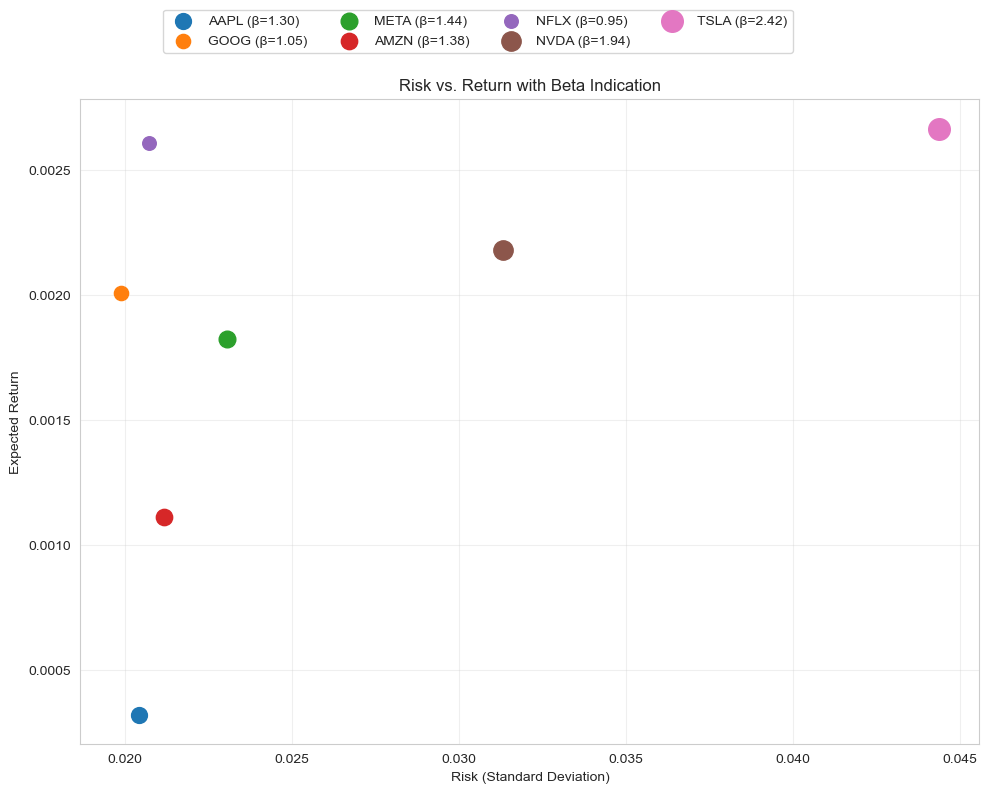

In [141]:
# Enhance the existing risk-return scatter plot with beta information
rets_filled = rets_compr.dropna()
plt.figure(figsize=(10, 8))

# Get mean returns and standard deviations
mean_returns = rets_compr.mean()
std_returns = rets_compr.std()

# Create scatter plot with point size based on beta
for stock in stock_list:
    if stock in betas:
        # Size points based on beta (larger point = higher beta)
        size = betas[stock] * 100
        plt.scatter(std_returns[stock], mean_returns[stock], s=size, 
                   label=f"{stock} (β={betas[stock]:.2f})")

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Risk vs. Return with Beta Indication')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(0.8, 1.15), ncol=4)
plt.tight_layout()
plt.show()

In [142]:
rets_compr['GOOG'].quantile(q=0.05)

-0.029754717954645453

In [143]:
rets_compr['GOOG'].quantile(q=0.01)

-0.04728246005633072

From the empirical quantiles given for both confience intervals, we know that the worst possible loss will not exceed 3.53 percent with 95% confidence and 4.96 percent with 99% confidence.

<h3> Predicting Future Risk and Value of Stocks </h3> 

We run the Monte Carlo Method on the GBM model to assess the stability and predict the future risk of our stocks. For this component, I'll be analyzing Google's stock.

In [144]:
def stock_monte_carlo(start_price, days, mu, sigma):
    dt = 1/days
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for t in range(1, days):
        shock[t] = np.random.normal(loc=0, scale=sigma * np.sqrt(dt))
        drift[t] = mu * dt
        price[t] = price[t-1] + (price[t-1] * (drift[t] + shock[t])) #New price = Old price + Old price*(shock+drift)
    return price


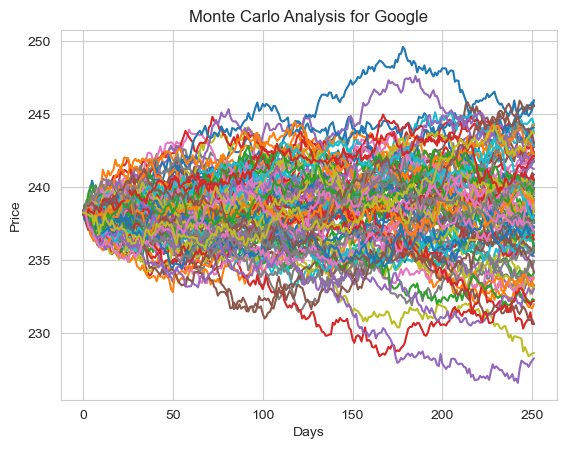

In [145]:
days = 252
mu = rets_compr.mean()['GOOG']
sigma = rets_compr.std()['GOOG']
start_price = GOOG.tail().iloc[4,0]

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')
plt.show()

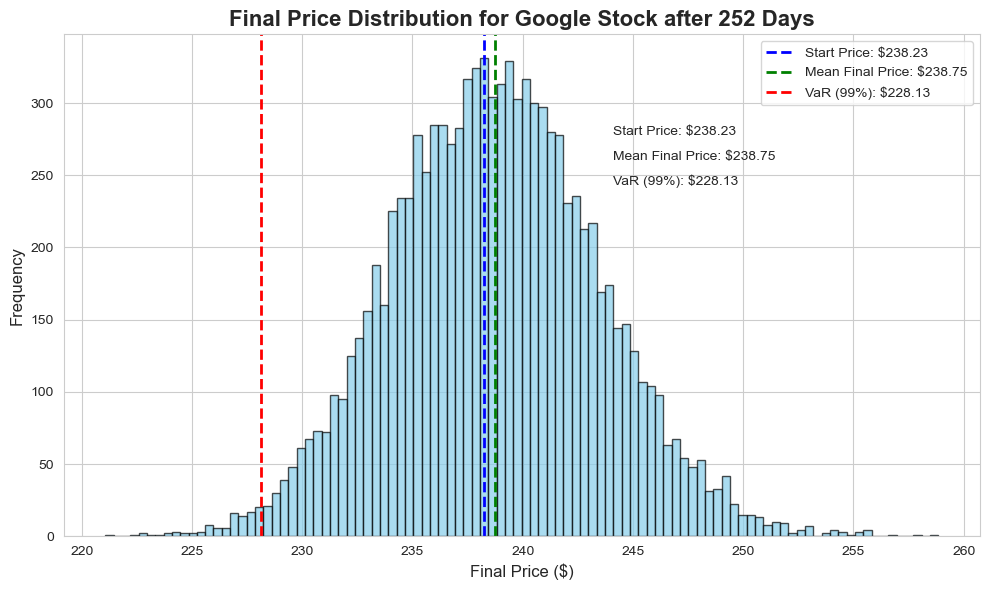

In [146]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulated_path = stock_monte_carlo(start_price, days, mu, sigma)
    simulations[run] = simulated_path[-1]

var_99 = np.percentile(simulations, 1)

plt.figure(figsize=(10, 6))
plt.hist(simulations, bins=100, color='skyblue', edgecolor='black', alpha=0.7)

plt.text(0.6, 0.8, f"Start Price: ${start_price:.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.75, f"Mean Final Price: ${simulations.mean():.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.7, f"VaR (99%): ${var_99:.2f}", transform=plt.gca().transAxes)

plt.axvline(x=start_price, color='blue', linestyle='--', linewidth=2, label=f"Start Price: ${start_price:.2f}")
plt.axvline(x=simulations.mean(), color='green', linestyle='--', linewidth=2, label=f"Mean Final Price: ${simulations.mean():.2f}")
plt.axvline(x=var_99, color='red', linestyle='--', linewidth=2, label=f"VaR (99%): ${var_99:.2f}")

plt.title(f"Final Price Distribution for Google Stock after {days} Days", weight='bold', fontsize=16)
plt.xlabel("Final Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()